O objetivo deste notebook é demonstrar como realizar dois testes estatísticos básicos que apliquei nos resultados da minha pesquisa de mestrado. 

Contextualizando:

No meu trabalho, eu realizei a classificação de sinais de eletroencefalografia em:
 - sinal normal (classe 0) 
 - sinal de crise epiléptica (classe 1)
 
O banco de dados que utilizei possui um desbalanceamento de classes extremo, portanto, utilizei técnicas como os pesos de classe e a alteração do limite de probabilidade de classificação. Além dessas técnicas, também realizei uma classificação usando os dados balanceados.

Utilizando o teste estatístico de Shapiro-Wilk, verifiquei a distribuição dos dados. 

Conclui a análise comparando os resultados obtidos nas duas classificações usando o teste de Wilcoxon.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import shapiro
from scipy.stats import wilcoxon

Inicialmente, fazemos a leitura dos dados e verificamos valores nulos.

O dataframe contém as métricas de performance da classificação dos 18 pacientes da amostra de teste.
- A letra I indica as métricas da classificação desbalanceada 
- A letra B indica as métricas da classificação balanceada

In [2]:
dados = pd.read_excel("results.xlsx")

In [3]:
dados.head()

,Acc-I,Acc-B,ROC-I,ROC-B,PR-I,PR-B,Precision 0 - I,Precision 0 - B,Recall 0 - I,Recall 0 - B,F1-Score 0 - I,F1-Score 0 - B,Precision 1 - I,Precision 1 - B,Recall 1 - I,Recall 1 - B,F1-Score 1 - I,F1-Score 1 - B
0,0.797450,0.851064,0.73,0.92,0.02,0.94,0.991827,0.785714,0.802033,0.965426,0.886889,0.866348,0.016869,0.955172,0.339474,0.736702,0.032142,0.831832
1,0.394749,0.565000,0.56,0.72,0.00,0.70,0.998203,0.842105,0.394213,0.160000,0.565211,0.268908,0.002221,0.535912,0.655172,0.970000,0.004426,0.690391
2,0.970521,0.775641,0.97,0.77,0.54,0.84,0.998373,0.732323,0.971805,0.895062,0.984910,0.805556,0.233755,0.850877,0.844512,0.646667,0.366160,0.734848
3,0.770466,0.813406,0.96,0.99,0.40,0.99,0.999468,0.983240,0.769024,0.637681,0.869232,0.773626,0.032084,0.731903,0.949275,0.989130,0.062071,0.841294
4,0.222017,0.565315,0.82,0.95,0.34,0.97,0.998147,0.869048,0.215448,0.162946,0.354400,0.274436,0.010790,0.533582,0.955357,0.975000,0.021340,0.689711


In [4]:
dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Acc-I            18 non-null     float64
 1   Acc-B            18 non-null     float64
 2   ROC-I            18 non-null     float64
 3   ROC-B            18 non-null     float64
 4   PR-I             18 non-null     float64
 5   PR-B             18 non-null     float64
 6   Precision 0 - I  18 non-null     float64
 7   Precision 0 - B  18 non-null     float64
 8   Recall 0 - I     18 non-null     float64
 9   Recall 0 - B     18 non-null     float64
 10  F1-Score 0 - I   18 non-null     float64
 11  F1-Score 0 - B   18 non-null     float64
 12  Precision 1 - I  18 non-null     float64
 13  Precision 1 - B  18 non-null     float64
 14  Recall 1 - I     18 non-null     float64
 15  Recall 1 - B     18 non-null     float64
 16  F1-Score 1 - I   18 non-null     float64
 17  F1-Score 1 - B   1

Obtemos a estatística descritiva através do método .describe()

In [5]:
dados.describe()

,Acc-I,Acc-B,ROC-I,ROC-B,PR-I,PR-B,Precision 0 - I,Precision 0 - B,Recall 0 - I,Recall 0 - B,F1-Score 0 - I,F1-Score 0 - B,Precision 1 - I,Precision 1 - B,Recall 1 - I,Recall 1 - B,F1-Score 1 - I,F1-Score 1 - B
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000
mean,0.848474,0.679783,0.749444,0.772778,0.190556,0.803889,0.988548,0.718834,0.858058,0.622170,0.899015,0.621785,0.163678,0.708592,0.382244,0.741063,0.138872,0.696552
std,0.214039,0.170850,0.187286,0.195352,0.205067,0.175303,0.010439,0.196839,0.220281,0.325019,0.170138,0.255989,0.244913,0.190596,0.343979,0.206659,0.182778,0.147167
min,0.222017,0.213889,0.220000,0.150000,0.000000,0.290000,0.960458,0.132743,0.215448,0.075000,0.354400,0.095847,0.001337,0.251012,0.003378,0.341182,0.002607,0.304668
25%,0.810961,0.565079,0.655000,0.705000,0.040000,0.707500,0.986222,0.655668,0.816517,0.319917,0.894937,0.410238,0.016875,0.534164,0.057941,0.599167,0.020570,0.633101
50%,0.947993,0.719820,0.780000,0.775000,0.125000,0.830000,0.990421,0.716392,0.964099,0.718605,0.973275,0.742441,0.057930,0.771309,0.309940,0.763119,0.072369,0.690051
75%,0.972363,0.803965,0.865000,0.912500,0.305000,0.937500,0.995384,0.840553,0.986660,0.900236,0.985944,0.809389,0.203773,0.842757,0.648822,0.907794,0.166566,0.810241
max,0.985930,0.945545,0.970000,0.990000,0.580000,1.000000,0.999468,0.989247,0.999926,0.965426,0.992909,0.943590,0.916667,0.955172,0.955357,0.990000,0.620000,0.947368


Definimos duas funções: 
- Função df_to_array que transforma os dados da coluna desejada em um vetor
- Função shapiro_wilk_test que realiza o teste de normalidade dos dados

In [7]:
def df_to_array (dataframe, column_name):

    data = dataframe[column_name].to_numpy()
    
    return data 

In [8]:
def shapiro_wilk_test(array_data):
    
    stat, p_value = shapiro(array_data)

    # Nível de significância
    alpha = 0.05

    if p_value > alpha:
        print(f"Os dados parecem ser normalmente distribuídos (p > 0.05). Valor de p: {p_value}, Estatística do teste: {stat}")
    else:
        print(f"Os dados não parecem ser normalmente distribuídos (p <= 0.05). Valor de p: {p_value}, Estatística do teste: {stat}")
    return stat, p_value


Agora, com as funções definidas, podemos realizar os testes estatísticos, começando pelo teste de normalidade.

Mas por que é importante realizar esse teste?

O teste de normalidade vai nos indicar se uma amostra de dados segue uma distribuição normal. 

Na distribuição normal os dados são simétricos em torno da média, com a maioria dos dados agrupados no centro e uma proporção menor dos dados agrupados nos extremos. 

Em alguns casos podemos ter uma noção da distribuição dos dados através do histograma.


<Axes: >

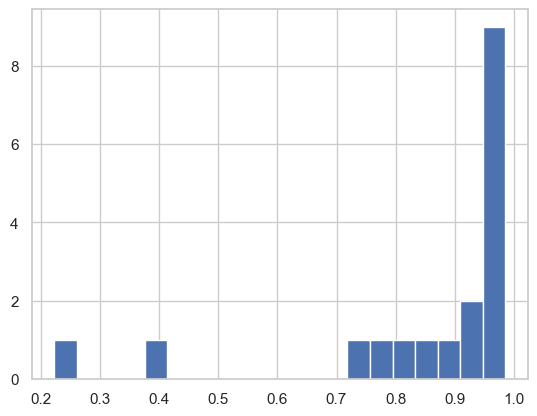

In [49]:
dados['Acc-I'].hist(bins=20)

A visualização da distribuição não nos ajudou muito, então seguimos para o teste de normalidade. 

Nesse caso, como temos um N < 30, aplicamos o Teste de Shapiro-Wilk.

O teste retorna os valores de "stat" e "p_value". "Stat" é um valor entre 0 e 1. Quanto mais próximo de 1, mais os dados se aproximam de uma distribuição normal.


In [9]:
acc_I = df_to_array(dados, 'Acc-I')
acc_B = df_to_array(dados, 'Acc-B')

In [10]:
normalidade = shapiro_wilk_test(acc_I)

Os dados não parecem ser normalmente distribuídos (p <= 0.05). Valor de p: 3.5860906791640446e-05, Estatística do teste: 0.6692975163459778


Agora que verificamos a normalidade dos dados, vamos verificar se houve diferenças entre os grupos.

Aqui, vamos comparar a acurácia obtida na classificação desbalanceada (I) e na balanceada (B)

Novamente, definimos uma função para o teste estatístico.

Escolhemos o Teste de Wilcoxon, apropriado para verificar diferenças entre grupos em amostras pareadas de dados que não suguem uma distribuição normal. 

O teste de Wilcoxon padrão é a opção two-sided, que testa diferenças significativas entre os grupos sem especificar a direção. As outras opções são a "less" e "greater" que especificam diferenças menores e maiores.  

In [11]:
def wilcoxon_test (data1, data2):

    wil_test, p_value = wilcoxon(data1, data2, alternative='two-sided')
    
    # Nível de significância
    alpha = 0.05

    if p_value > alpha:
        print(f"Não há diferenças entre os grupos (p > 0.05).")
    else:
        print(f"Há diferenças entre os grupos (p <= 0.05).")
    return wil_test, p_value 

In [12]:
wilcoxon_test(acc_I, acc_B)

Há diferenças entre os grupos (p <= 0.05).


(27.0, 0.00896453857421875)

Sabendo que nossos dados não seguem uma distribuição normal, podemos usar o Boxplot para visulizar nossa amostra.
 
É possível visualizar os quartis, a mediana, os limites superiores e inferiores e também os outliers.

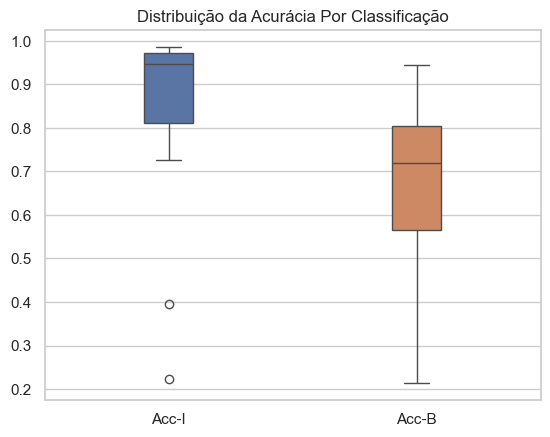

In [47]:
# Selecione os dados de acc_I e acc_B do dataframe
data = [dados['Acc-I'], dados['Acc-B']]
sns.set_theme(style='whitegrid', palette='deep')

# Crie o boxplot com Seaborn
sns.boxplot(data=data, width=0.2)

# Adicione um título ao gráfico
plt.title('Distribuição da Acurácia Por Classificação')
# Mostre o boxplot
plt.show()


Concluimos a nossa análise, é importante notar que exemplifiquei usando apenas duas variávies, mas realizei os testes para todos os resultados obtidos. 

A análise completa está disponível aqui: https://repositorio.ufrn.br/handle/123456789/55590